### Importações de bibliotecas

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

from plots import plot_distribution, plot_both_distributions
from psi import create_psi_table, psi, psi_interpretation

import warnings
warnings.filterwarnings("ignore")

### Obtenção das predições do modelo armazenadas no BigQuery

In [3]:
def get_scores():
    query = 'SELECT * FROM `red-seeker-334115.dsjobs.predictions`'
    return pd.read_gbq(query)

df_predicoes = get_scores()
df_predicoes.head()

,id,request_datetime,result,status
0,12215,2021-12-18 02:59:46,0,Not Looking for Job
1,9858,2021-12-18 03:05:37,0,Not Looking for Job
2,31806,2021-12-18 03:05:37,0,Not Looking for Job
3,27385,2021-12-18 03:05:38,1,Looking for Job
4,32403,2021-12-18 03:05:36,0,Not Looking for Job


### Distribuição das predições

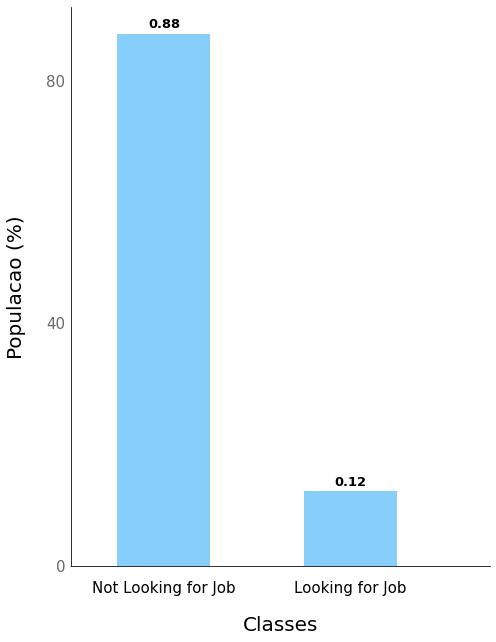

In [4]:
plot_distribution(df_predicoes['status'], 'distribuicao_predicoes.png')

### Obtenção dos dados de treino armazenados no Bucket

In [5]:
# $ gsutil -m cp -r gs://artefatos-do-modelo-dsjobs/ds-job-train.csv dataset/

df_treino = pd.read_csv('dataset/ds-job-train.csv')
df_treino['classes'] = df_treino['target'].map({
    1.0: 'Looking for Job',
    0.0: 'Not Looking for Job'})
df_treino.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,classes
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,Looking for Job
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,Not Looking for Job
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,Not Looking for Job
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,Looking for Job
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,Not Looking for Job


### Distribuição dos dados de treino

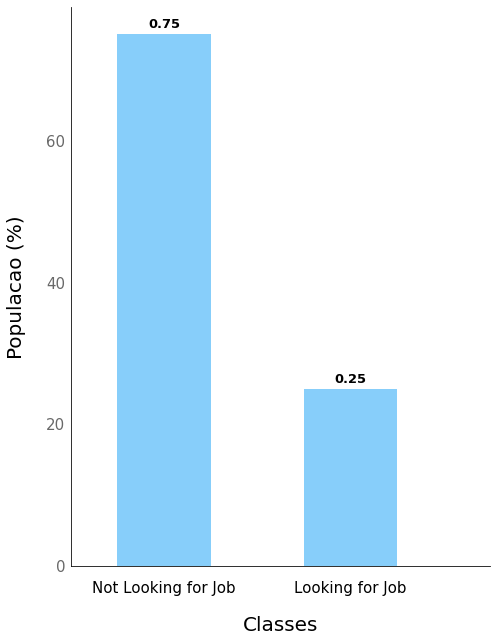

In [6]:
plot_distribution(df_treino['classes'], 'distribuicao_treino.png')

### Comparação das distribuições

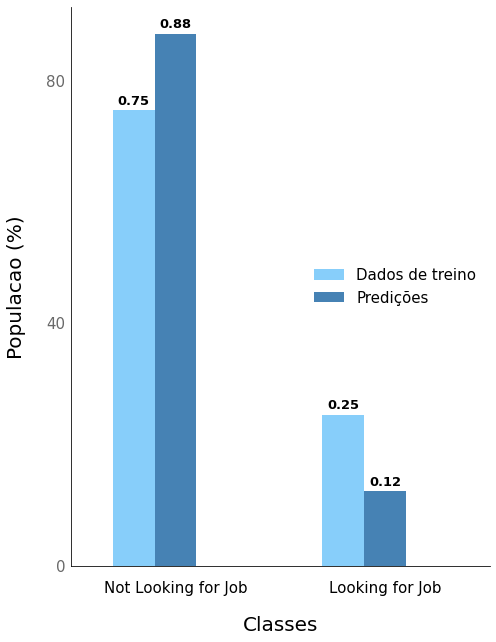

In [7]:
plot_both_distributions(('Dados de treino', df_treino['classes']), ('Predições', df_predicoes['status']), 'distribuicoes.png')

### Cálculo do PSI para comparação das distribuições

In [8]:
actual = df_predicoes['status']
expected = df_treino['classes']

create_psi_table(actual, expected)

,classes,bucket,actual_count,expected_count,actual_percent,expected_percent,actual-expected,ln(actual/percent),psi
0,Not Looking for Job,1,123,4777,0.123,0.249348,-0.126348,-0.706663,0.089285
1,Looking for Job,2,877,14381,0.877,0.750652,0.126348,0.155564,0.019655


In [9]:
print('PSI:', psi(actual, expected))

PSI: 0.10894


In [10]:
psi_interpretation(actual, expected)

,scales,description,your_scale
0,PSI < 0.1,no significant population change,
1,PSI < 0.2,moderate population change,X
2,PSI >= 0.2,significant population change,
